In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg

In [2]:
#Set the side of triangle
dx = 0.2
d_shift = dx / np.sqrt(2)
d_shift = round(d_shift, 4)


In [3]:
# If we know the coordinates of the corners in degrees:
x_left = 0
y_left = 30
p_left = np.array([x_left,y_left])

x_top = 20
y_top = 50
p_top = np.array([x_top,y_top])

x_right = 35
y_right = 35
p_right = np.array([x_right,y_right])

x_bottom = 15
y_bottom = 15
p_bottom = np.array([x_bottom,y_bottom])

total_x = np.sqrt(2)*(x_bottom - x_left)
total_y = np.sqrt(2)*(y_top - y_left)

In [4]:
print (int(total_x/dx))
print (int(total_y/dx))

106
141


In [5]:
#compute coordinates of grid (more convenient)
grid_nodes = []

for i in range(int(total_x/dx)+1): 
#for i in range(10): 
    
        x = x_left + i * d_shift
        y = y_left - i * d_shift
        
        #while x < math.ceil((x_top + i*d_shift) and y < math.ceil((y_top - i*d_shift):
        while x <= (x_top + i*d_shift) and y <= (y_top - i*d_shift):
            grid_nodes += [(x,y)]
            #grid_nodes += [(round(x,4),round(y,4))]
            x += d_shift
            y += d_shift
            
        
            
        

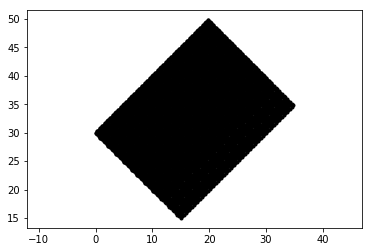

In [65]:
# !!LONG RUN, run just to check

for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.axis('equal')
plt.show()

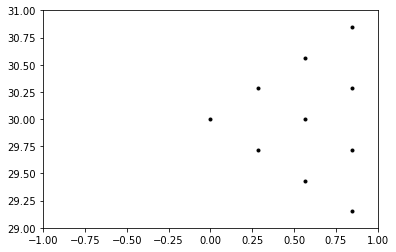

In [66]:
# !!LONG RUN, run just to check

#Plot western corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.xlim([-1,1])
plt.ylim([29,31])
#plt.axis('equal')
plt.show()

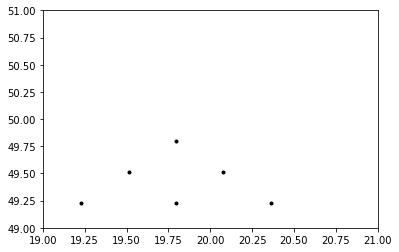

In [67]:
# !!LONG RUN, run just to check

#Plot northern corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.xlim([19,21])
plt.ylim([49,51])
#plt.axis('equal')
plt.show()

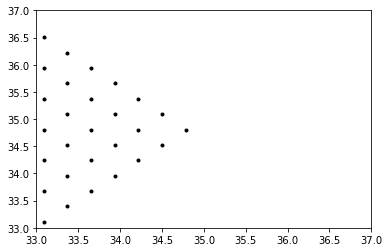

In [68]:
# !!LONG RUN, run just to check

#Plot eastern corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.xlim([33,37])
plt.ylim([33,37])
#plt.axis('equal')
plt.show()

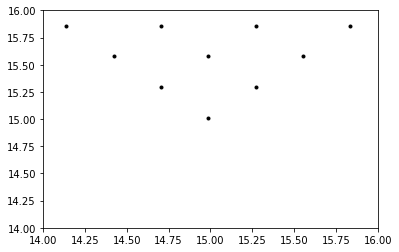

In [69]:
# !!LONG RUN, run just to check

#Plot southern corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.xlim([14,16])
plt.ylim([14,16])
#plt.axis('equal')
plt.show()

In [7]:
len (grid_nodes)

15194

In [8]:
# create list of nodes:
nodenum = np.arange(len(grid_nodes)) + 1
nodenum_arr = nodenum.reshape(len(grid_nodes),1)
print (nodenum_arr)

[[    1]
 [    2]
 [    3]
 ...
 [15192]
 [15193]
 [15194]]


In [9]:
#reshape to the matrix structure
grid_nodes_array = np.array (grid_nodes)
grid_nodes_with_number = np.hstack((grid_nodes_array,nodenum_arr))
print (grid_nodes_with_number)
grid_nodes_3d = grid_nodes_with_number.reshape(int(total_x/dx)+1,int(total_y/dx)+1,3)


[[0.00000e+00 3.00000e+01 1.00000e+00]
 [1.41400e-01 3.01414e+01 2.00000e+00]
 [2.82800e-01 3.02828e+01 3.00000e+00]
 ...
 [3.46430e+01 3.46662e+01 1.51920e+04]
 [3.47844e+01 3.48076e+01 1.51930e+04]
 [3.49258e+01 3.49490e+01 1.51940e+04]]


In [10]:
#these two nodes should be removed
print(grid_nodes_3d[0,int(total_y/dx),:])
print(grid_nodes_3d[int(total_x/dx),0,:])


[ 19.9374  49.9374 142.    ]
[1.49884e+01 1.50116e+01 1.50530e+04]


In [11]:
# updated version of glossary
nodsjk =  {1 : (0,1)}
jknods =  {(0,1) : 1}
nodx = np.zeros(shape=(len(grid_nodes)))
nody = np.zeros(shape=(len(grid_nodes)))
for i in range (0, int(total_y/dx)):
    
    nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
    nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
    
    nodsjk.update({i+1 : ( int(nodx[i]), int(nody[i])) } )
    jknods.update( {( int(nodx[i]), int(nody[i])) : i+1 })

for i in range (int(total_y/dx)+1, len (grid_nodes)-int(total_y/dx)-1):
    
    nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
    nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
    
    nodsjk.update({i : ( int(nodx[i]), int(nody[i])) } )
    jknods.update( {( int(nodx[i]), int(nody[i])) : i })

for i in range (len (grid_nodes)-int(total_y/dx), len (grid_nodes)):
    
    nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
    nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
    
    nodsjk.update({i-1 : ( int(nodx[i]), int(nody[i])) } )
    jknods.update( {( int(nodx[i]), int(nody[i])) : i-1})


    

In [12]:
#Check if the reshaping is correct 
print (nodsjk[int(total_y/dx)])
print (nodsjk[int(total_y/dx)+1])
print (nodsjk[len (grid_nodes)-int(total_y/dx)-2])
print (nodsjk[len (grid_nodes)-int(total_y/dx)-1])
print (nodsjk[len (grid_nodes)-int(total_y/dx)])

(0, 140)
(1, 0)
(105, 141)
(106, 1)
(106, 2)


In [13]:
# if node on the boundary for line
def is_edge_line(xy, dx, p_left, p_top, p_right, p_bottom):
    on_edge=0
    if abs(np.cross(p_left-p_top, p_top-xy))/np.linalg.norm(p_left-p_top)<dx-0.001 or \
    abs(np.cross(p_left-p_bottom, p_bottom-xy))/np.linalg.norm(p_left-p_bottom)<dx-0.001 or \
    abs(np.cross(p_right-p_bottom, p_bottom-xy))/np.linalg.norm(p_right-p_bottom)<dx-0.001 or \
    abs(np.cross(p_right-p_top, p_top-xy))/np.linalg.norm(p_right-p_top)<dx-0.001: on_edge=1
    return on_edge

In [14]:
#Check for the border node 
is_edge_line(grid_nodes[len (grid_nodes)-int(total_y/dx)-1], dx, p_left, p_top, p_right, p_bottom)

1

In [15]:
# find 3 nodes for the corresponding triangle
elems = []
for n in range(1, len(grid_nodes)-1):
    i = nodsjk[n][0]
    j = nodsjk[n][1]
    
    i1 = i
    j1 = j+1
    if (i1,j1) in jknods.keys(): 
        n1 = jknods[ (i1,j1) ]
        
        i2 = i+1
        j2 = j+1
        if (i2,j2) in jknods.keys():
            n2 = jknods[ (i2,j2) ]
            
            elems += [(n,n1,n2)]
    
    i1 = i+1
    j1 = j
    if (i1,j1) in jknods.keys(): 
        n2 = jknods[ (i1,j1) ]
            
        i2 = i+1
        j2 = j+1
        if (i2,j2) in jknods.keys():
            n1 = jknods[ (i2,j2) ]
            
            elems += [(n,n1,n2)]
    
            

In [16]:
grid_nodes[int(total_y/dx)]
grid_nodes.pop(int(total_y/dx))

(19.93740000000007, 49.93739999999967)

In [17]:
grid_nodes[len(grid_nodes)-int(total_y/dx)-1]
grid_nodes.pop(len(grid_nodes)-int(total_y/dx)-1)

(14.9884, 15.0116)

In [18]:
# write nodes to the files

f = open("nod2d.out", "w")
f.write( "%d\n" % len(grid_nodes))
for n in range(len(grid_nodes)):
    f.write( "%d   %.5f  %.5f  %d\n" % (n+1, grid_nodes[n][0], grid_nodes[n][1], is_edge_line(grid_nodes[n], dx, p_left, p_top, p_right, p_bottom) ) )
f.close() 

In [19]:
# write elements to the file
f = open("elem2d.out", "w")
f.write( "%d\n" % len(elems))
for n in range(len(elems)):
    f.write( "%d    %d    %d\n" % (elems[n][0],elems[n][1], elems[n][2]) )
f.close() 

In [21]:
#Set vertical depths
zbar=[0,\
9.03766,\
18.9791,\
29.9146,\
41.9438,\
55.1758,\
69.731,\
85.7418,\
103.354,\
122.727,\
144.037,\
167.478,\
193.264,\
221.628,\
252.828,\
287.149,\
324.901,\
366.429,\
412.11,\
462.358,\
517.632,\
578.433,\
645.314,\
718.883,\
799.809,\
888.827,\
986.747,\
1094.46,\
1212.94,\
1343.28,\
1486.64,\
1644.34,\
1817.81,\
2008.63,\
2218.53,\
2449.43,\
2703.41,\
2982.78,\
3290.1,\
3628.15,\
4000]

In [22]:
Nz = len(zbar)

In [23]:
f = open("aux3d.out", "w")
f.write( "%d\n" % Nz )
for z in zbar:
    f.write( "-%.5f\n" % z )
for n in range(len(nodsjk)):
    f.write( "-%.1f\n" % zbar[-1] )
f.close() 